In [4]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
import copy

In [44]:
a=np.eye(5)
dropout(a)

[ 0.27013357  0.33015928  0.24415638  0.42693669  0.84107904]


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [2]:
def mse(x,y):
    return 0.5*np.mean(x-y)**2

def show_error(error_list):
    plt.clf()
    plt.plot(error_list)
    plt.show()

In [6]:
def f(x,is_derivative=False,name='elu'):
    if name=='relu':
        return relu(x,is_derivative)
    if name=='sigmoid':
        return sigmoid(x,is_derivative)
    if name=='tanh':
        return tanh(x,is_derivative)
    if name=='elu':
        return elu(x,is_derivative)
    
def sigmoid(a,is_derivative=False):
    x=copy.copy(a)
    if is_derivative:
        return x*(1-x)
    return 1/(1+np.exp(-x))    

def relu(a,is_derivative=False):
    x=copy.copy(a)
    if not is_derivative:
        return np.maximum(x,0)
    else:
        x[x>=0]=1
        x[x<0]=0
        return x
def tanh(a,is_derivative=False):
    x=copy.copy(a)
    if not is_derivative:
        return np.tanh(x)
    else:
        return 1-x**2
    
def elu(a,is_derivative=False):
    alpha=1
    x=copy.copy(a)
    if not is_derivative:
        x[x<0]=alpha*(np.exp(x[x<0])-1)
        return x
    else:
        x[x>=0]=1
        x[x<0]=x[x<0]+alpha
        return x

In [47]:
def drop(a,drop_name='dropout',ratio=0.25):
    if drop_name=='dropout':
        return dropout(a,ratio)
    elif dop_name=="dc":
        return drop_connect(a,ratio)


def drop_connect(a,ratio=0.05):
    x=copy.copy(a)
    rand=np.random.random(list(x.shape))
    x[rand<ratio]=0
    return x

# we set to 
def dropout(a,ratio):
    x=copy.copy(a)
    rand=np.random.rand(x.shape[1])
    x[:,rand<ratio]=0
    return x

[[-1.]
 [-1.]
 [-1.]
 [-1.]]


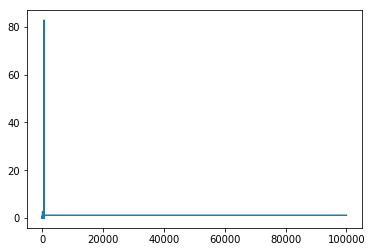

In [60]:
def neural_network(x,y,epochs,hidden=[2,3],bias=True,gamma=0.1,drop_name='dropout'):
    length=len(hidden)
    error_list=[]
    
#     initialize the weigths for consistant matrix multiplications
    weights_list=[2*np.random.rand(x.shape[1],hidden[0])-1]
    for i in range(1,length):
        weights_list.append(2*np.random.rand(hidden[i-1],hidden[i])-1)
    weights_list.append(2*np.random.rand(hidden[-1],y.shape[1])-1)
    
#     add bias 
#     there are as many bias as hidden_layer+1
    if bias:
        bias=2*np.random.rand(length+1)-1
    else:
        bias=np.zeros(length+1)
        
#     learning rate
    for iter in range(epochs):
#         list containing the output of each layer
#         len(out_list)=len(hidden)+1
        out_list=[]
        for j in range(0,length+1):
#             if first layer the first element is x
            if j==0:
                out_list.append(f(x.dot(drop(weights_list[0],drop_name))+bias[j]))
#             else this is the result of the previous layer
            else:
#                we don t apply dropout to the last layer because we might annul one of the outputs neurons   
                if j!=length:
                    out_list.append(f(out_list[-1].dot(drop(weights_list[j],drop_name))+bias[j]))
                else:
                    out_list.append(f(out_list[-1].dot(weights_list[j])+bias[j]))
#         print out_list
#         compute the error of the algorithm (for the error curve)        
        error = mse(out_list[-1],y)
        
#         compute the first two partial derivative a the thumb rule
        delta_list=[(out_list[-1]-y)*f(out_list[-1],True)]
#         print out_list
        for j in range(length,-1,-1):
#             print out_list
#             we use the previous result the previous delta
#             we then multiply it by the weights of the next layer
            delta_list.append(delta_list[-1].dot(weights_list[j].T)*f(out_list[j-1],True))
        
#         update the weights between each layer 
#         there are (lengths+1) weights matrix
        for j in range(0,length+1):
#             if this is the first weights matrix, then the input isn t the result of the previous layer but x (input data)
            if j==0:
                weights_list[j] -= gamma* x.T.dot(delta_list[length])
#             if this is not the first weights matrix, then the input is the result of the previous layer
            else:
                weights_list[j] -= gamma* out_list[j-1].T.dot(delta_list[length-j])
        
        for j in range(length,-1,-1):
            bias[j] -= gamma * np.mean(delta_list[j+1])
#         we append each error to a list to see the evolution of the error
        error_list.append(error)
    print out_list[-1]
#     show the error with pyplot
    show_error(error_list)

x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0,1,1,0]]).T

neural_network(x,y,hidden=[4,2],epochs=100000,gamma=0.1,bias=True,drop_name='dropout')